---

### **一、感知机简介**

**1. 什么是感知机？**

感知机（Perceptron）是最基本的神经网络模型，由弗兰克·罗森布拉特（Frank Rosenblatt）在1957年提出。它是一个二分类的线性模型，可以用于解决线性可分的分类问题。

**2. 感知机的工作原理**

感知机的核心是模拟生物神经元的工作方式。它接收输入信号，通过权重进行加权求和，再通过激活函数（通常是阶跃函数）得到输出。

**数学表达式：**

$$
y = \begin{cases}
1, & \text{if } \sum_{i=1}^{n} w_i x_i + b \geq 0 \\
0, & \text{otherwise}
\end{cases}
$$

- \( $x_i$ \)：第 \( $i$ \) 个输入
- \( $w_i$ \)：第 \( $i$ \) 个输入的权重
- \( $b$ \)：偏置（bias）
- \( $y$ \)：输出

**3. 感知机的学习目标**

通过调整权重 \( $w_i$ \) 和偏置 \( $b$ \)，使得感知机能够正确地分类给定的输入数据。

---


### **二、实现简单的感知机**

**步骤概览：**

1. 导入必要的库
2. 准备数据集
3. 初始化参数
4. 定义激活函数
5. 实现训练过程
6. 测试模型

#### **1. 导入必要的库**


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### **2. 准备数据集**

我们以逻辑与（AND）运算为例，它是线性可分的。数据集如下：

In [64]:
# 输入数据和标签
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

**解释：**

- **X** 是输入矩阵，每行是一个输入样本，每列是一个特征。
- **y** 是对应的标签（目标输出）。

#### **3. 初始化参数**
在训练开始前，我们需要初始化权重和偏置。

In [65]:
#Initial weights and bias
weights = np.random.rand(X.shape[1])
#Set bias as 0 for now
bias = 0.5

#Learning rate
learning_rate = 0.1
#Number of epochs
epochs = 10

**解释：**

- weights：权重向量，长度与输入特征数相同。
- bias：偏置项，控制决策边界的位置。
- learning_rate：学习率，控制每次参数更新的幅度。
- epochs：训练整个数据集的次数。
#### 4. 定义激活函数
感知机通常使用单位阶跃函数（Heaviside step function）作为激活函数。

In [66]:
#Define the activation function
def step_function(x):
    return 1 if x >=0 else 0

**解释：**
当输入x大于等于0时返回1，输入小于0时返回0

#### 5.开始训练过程
通过误差向真实方向调整权重与偏差

In [67]:
errors = []
for epoch in range(epochs):
    print(f"This is epoch {epoch}")
    for i in range(X.shape[0]):
        xi = X[i]
        print(f"Input: {xi}, Label: {y[i]}, weights: {weights}, bias: {bias}")
        #Calculate the dot product of input and weights
        z = np.dot(xi, weights) + bias
        #Apply the activation funtion
        y_pred = step_function(z)
        #Calculate the error
        error = y[i] - y_pred
        errors.append(error)
        print(f"z:{z}, predict:{y_pred}, Error: {error}")
        #Update the weights
        weights = weights + learning_rate *error *xi
        #Update the bias
        bias = bias +learning_rate * error
        print(f"Updated weights: {weights}, Updated bias: {bias}")
        print("=========================================")

This is epoch 0
Input: [0 0], Label: 0, weights: [0.01779961 0.39563509], bias: 0.5
z:0.5, predict:1, Error: -1
Updated weights: [0.01779961 0.39563509], Updated bias: 0.4
Input: [0 1], Label: 1, weights: [0.01779961 0.39563509], bias: 0.4
z:0.7956350926547604, predict:1, Error: 0
Updated weights: [0.01779961 0.39563509], Updated bias: 0.4
Input: [1 0], Label: 1, weights: [0.01779961 0.39563509], bias: 0.4
z:0.41779960779371905, predict:1, Error: 0
Updated weights: [0.01779961 0.39563509], Updated bias: 0.4
Input: [1 1], Label: 1, weights: [0.01779961 0.39563509], bias: 0.4
z:0.8134347004484794, predict:1, Error: 0
Updated weights: [0.01779961 0.39563509], Updated bias: 0.4
This is epoch 1
Input: [0 0], Label: 0, weights: [0.01779961 0.39563509], bias: 0.4
z:0.4, predict:1, Error: -1
Updated weights: [0.01779961 0.39563509], Updated bias: 0.30000000000000004
Input: [0 1], Label: 1, weights: [0.01779961 0.39563509], bias: 0.30000000000000004
z:0.6956350926547604, predict:1, Error: 0
Upd

Text(0, 0.5, 'Error')

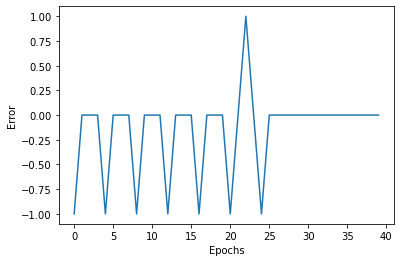

In [68]:
# Visualize the errors over epochs
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")


#### 6.测试训练结果

In [69]:
predictions = []
for i in range(X.shape[0]):
    xi = X[i]
    z = np.dot(xi,weights) + bias
    y_pred = step_function(z)
    predictions.append(y_pred)

print(f"Predictions: {predictions}")
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

Predictions: [0, 1, 1, 1]
Final weights: [0.11779961 0.39563509]
Final bias: -0.09999999999999998


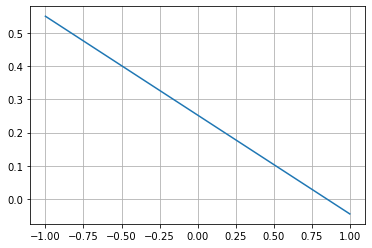

In [70]:
#visualize the decision boundary
x = np.linspace(-1, 1, 100)
y = -weights[0]/weights[1] * x - bias/weights[1]
plt.plot(x,y)
plt.grid()
plt.show()


### **三、深入理解**

**1. 感知机为何只能解决线性可分问题？**

因为感知机的决策边界是一个线性函数（直线或平面），无法对非线性数据进行准确分类。

**2. 学习率的作用**

学习率决定了每次更新的步长，过大可能导致震荡，过小则收敛速度慢。通常需要根据数据和模型进行调整。

**3. 训练过程中的参数更新**

- **权重更新公式：**

  $$
  w_i = w_i + \Delta w_i
  $$

  其中，

  $$
  \Delta w_i = \eta \times error \times x_i
  $$

- **偏置更新公式：**

  $$
  b = b + \Delta b
  $$

  其中，

  $$
  \Delta b = \eta \times error
  $$

  - \( $\eta$ \) 是学习率。
  - \( $error$ \) 是误差。

**4. 训练次数（Epoch）**

多次遍历数据集可以让模型更好地学习数据的特征，但也要防止过拟合。

---


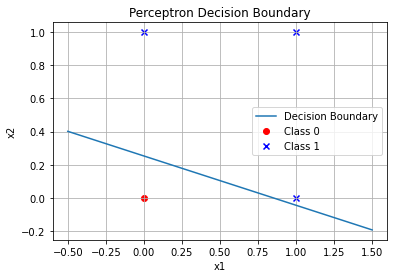

In [71]:
# 输入数据和标签
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

# 训练完成后的权重和偏置（使用你的训练结果）
final_weights = weights  # 确保 weights 是训练后的值
final_bias = bias        # 确保 bias 是训练后的值

# 绘制样本点
for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='red', marker='o', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='x', label='Class 1' if i == 1 else "")

# 定义 x1 的取值范围
x1_values = np.linspace(-0.5, 1.5, 100)

# 计算对应的 x2 值
if final_weights[1] != 0:
    x2_values = - (final_weights[0] * x1_values + final_bias) / final_weights[1]
    plt.plot(x1_values, x2_values, label='Decision Boundary')
else:
    x1_boundary = - final_bias / final_weights[0]
    plt.axvline(x=x1_boundary, label='Decision Boundary')

# 添加图形标题和标签
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')

# 显示图例
plt.legend()

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()


# 实践例子（Iris数据集分类）

---

### **一、Iris 数据集简介**

**1. 数据集概述**

Iris 数据集是机器学习和统计学中常用的多元数据集。它包含了 150 个样本，分为三类鸢尾花（Iris setosa、Iris versicolor、Iris virginica），每类 50 个样本。每个样本有四个特征：

- 花萼长度（Sepal Length）
- 花萼宽度（Sepal Width）
- 花瓣长度（Petal Length）
- 花瓣宽度（Petal Width）

**2. 我们的任务**

由于感知机只能处理二分类问题，我们将选择其中两个类别进行分类。为简化问题，我们选择以下内容：

- **分类目标**：区分 Iris setosa（山鸢尾）和 Iris versicolor（变色鸢尾）。
- **使用特征**：花瓣长度和花瓣宽度。

---

### **二、数据准备**

#### **1. 导入必要的库**


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

- `numpy`：用于数值计算。
- `matplotlib.pyplot`：用于数据可视化。
- `sklearn.datasets`：用于加载 Iris 数据集。

#### **2. 加载数据集**



In [73]:
Iris = pd.read_csv("iris.csv")
Iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### **3.提取所需数据**

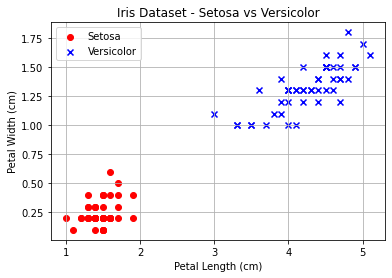

In [74]:
#提取前100行数据
X = Iris.iloc[0:100,[2,3]].values
y = Iris.iloc[0:100,4].values
# 绘制散点图
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Iris Dataset - Setosa vs Versicolor')
plt.grid()
plt.show()


In [75]:
# 3. 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 使用 np.where 替换值
y = np.where(y == 'Iris-versicolor', 0, 1)

In [76]:
weights = np.random.rand(X.shape[1])
bias = 0.5
learning_rate = 0.1
epochs = 5

def step_function(x):
    return 1 if x>=0 else 0

This is epoch 0
Input: [-1.01435952 -1.03824799], Label: 1, weights: [0.86431493 0.34356807], bias: 0.5
z:-0.7334349276262677, predict:0, Error: 1
Updated weights: [0.76287897 0.23974327], Updated bias: 0.6
Input: [-1.01435952 -1.03824799], Label: 1, weights: [0.76287897 0.23974327], bias: 0.6
z:-0.42274651519057727, predict:0, Error: 1
Updated weights: [0.66144302 0.13591847], Updated bias: 0.7
Input: [-1.08374115 -1.03824799], Label: 1, weights: [0.66144302 0.13591847], bias: 0.7
z:-0.1579501016613809, predict:0, Error: 1
Updated weights: [0.55306891 0.03209367], Updated bias: 0.7999999999999999
Input: [-0.94497788 -1.03824799], Label: 1, weights: [0.55306891 0.03209367], bias: 0.7999999999999999
z:0.2440409274470403, predict:1, Error: 0
Updated weights: [0.55306891 0.03209367], Updated bias: 0.7999999999999999
Input: [-1.01435952 -1.03824799], Label: 1, weights: [0.55306891 0.03209367], bias: 0.7999999999999999
z:0.20566810195136276, predict:1, Error: 0
Updated weights: [0.55306891 

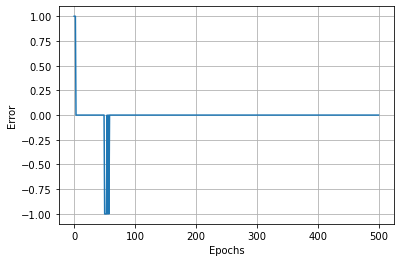

In [77]:
errors = []

for epoch in range(epochs):
    print(f'This is epoch {epoch}')
    for i in range(X.shape[0]):
        xi = X[i]
        print(f"Input: {xi}, Label: {y[i]}, weights: {weights}, bias: {bias}")
        z = np.dot(xi,weights) + bias
        error = y[i] - step_function(z)
        errors.append(error)
        print(f"z:{z}, predict:{step_function(z)}, Error: {error}")    
        weights = weights + learning_rate * error *xi
        bias = bias + learning_rate *error
        print(f"Updated weights: {weights}, Updated bias: {bias}")


plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid()
plt.show()

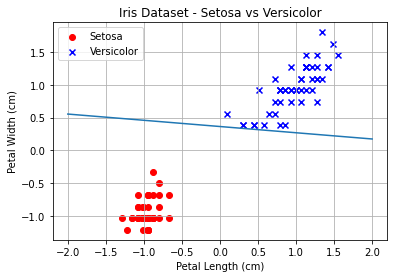

In [78]:
weights
# Visualize the decision boundary
x = np.linspace(-2, 2, 100)
y = -weights[0]/weights[1] * x - bias/weights[1]
plt.plot(x,y)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Iris Dataset - Setosa vs Versicolor')
plt.grid()
plt.show()

Epoch 1/10, 错误分类数量：2
Epoch 2/10, 错误分类数量：0
Epoch 3/10, 错误分类数量：0
Epoch 4/10, 错误分类数量：0
Epoch 5/10, 错误分类数量：0
Epoch 6/10, 错误分类数量：0
Epoch 7/10, 错误分类数量：0
Epoch 8/10, 错误分类数量：0
Epoch 9/10, 错误分类数量：0
Epoch 10/10, 错误分类数量：0
模型在训练集上的准确率：100.00%


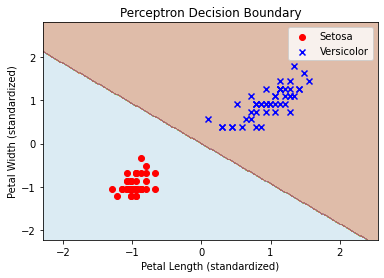

In [ ]:
# 1. 加载数据集
iris = datasets.load_iris()
X = iris.data[:100, [2, 3]]  # 花瓣长度和宽度
y = iris.target[:100]        # 标签

# 2. 标签转换为 -1 和 1
y = np.where(y == 0, -1, 1)

# 3. 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. 初始化参数
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# 5. 定义符号函数
def sign_function(x):
    return 1 if x >= 0 else -1

# 6. 训练模型
errors = []
for epoch in range(epochs):
    error_count = 0
    for xi, target in zip(X, y):
        linear_output = np.dot(xi, weights) + bias
        if target * linear_output <= 0:
            weights += learning_rate * target * xi
            bias += learning_rate * target
            error_count += 1
    errors.append(error_count)
    print(f'Epoch {epoch+1}/{epochs}, 错误分类数量：{error_count}')

# 7. 评估模型
def predict(x):
    return sign_function(np.dot(x, weights) + bias)

y_pred = np.array([predict(xi) for xi in X])
y_true = np.where(y == -1, 0, 1)
y_pred_labels = np.where(y_pred == -1, 0, 1)
accuracy = np.mean(y_pred_labels == y_true)
print(f'模型在训练集上的准确率：{accuracy * 100:.2f}%')

# 8. 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = np.array([predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.show()


In [81]:
# 预测所有样本
y_pred = []
for xi in X:
    z = np.dot(xi, weights) + bias
    y_hat = step_function(z)
    y_pred.append(y_hat)

# 计算准确率
accuracy = np.mean(np.array(y_pred) == y)
print(f'模型在训练集上的准确率：{accuracy * 100:.2f}%')



模型在训练集上的准确率：100.00%


Epoch 0, Total Error: 0
Epoch 0, Total Error: 2
Epoch 1, Total Error: 0
Epoch 2, Total Error: 0
Epoch 3, Total Error: 0
Epoch 4, Total Error: 0
Epoch 5, Total Error: 0
Epoch 6, Total Error: 0
Epoch 7, Total Error: 0
Epoch 8, Total Error: 0
Epoch 9, Total Error: 0
Epoch 10, Total Error: 0
Epoch 10, Total Error: 0
Epoch 11, Total Error: 0
Epoch 12, Total Error: 0
Epoch 13, Total Error: 0
Epoch 14, Total Error: 0
Epoch 15, Total Error: 0
Epoch 16, Total Error: 0
Epoch 17, Total Error: 0
Epoch 18, Total Error: 0
Epoch 19, Total Error: 0
Epoch 20, Total Error: 0
Epoch 20, Total Error: 0
Epoch 21, Total Error: 0
Epoch 22, Total Error: 0
Epoch 23, Total Error: 0
Epoch 24, Total Error: 0
Epoch 25, Total Error: 0
Epoch 26, Total Error: 0
Epoch 27, Total Error: 0
Epoch 28, Total Error: 0
Epoch 29, Total Error: 0
Epoch 30, Total Error: 0
Epoch 30, Total Error: 0
Epoch 31, Total Error: 0
Epoch 32, Total Error: 0
Epoch 33, Total Error: 0
Epoch 34, Total Error: 0
Epoch 35, Total Error: 0
Epoch 36, T

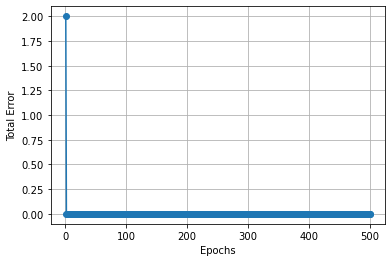

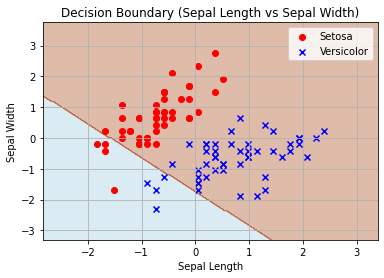

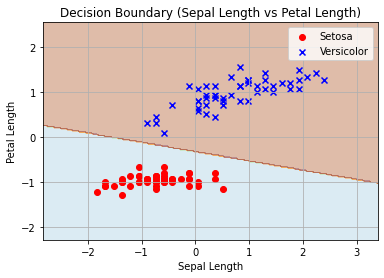

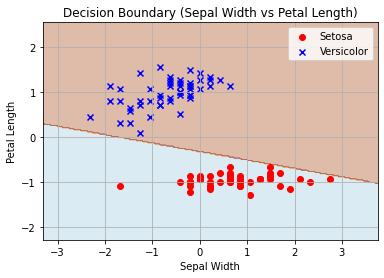

In [ ]:
# 1. 读取数据
Iris = pd.read_csv("iris.csv")

# 2. 提取前100行数据（Setosa 和 Versicolor）
X = Iris.iloc[0:100, 0:3].values  # 花萼长度、花萼宽度、花瓣长度
y = Iris.iloc[0:100, -1].values   # 类别名称

# 3. 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. 标签转换
y = np.where(y == 'Iris-setosa', 0, 1)

# 5. 初始化参数
weights = np.random.rand(X.shape[1])
bias = 0.5
learning_rate = 0.1
epochs = 500

# 6. 定义激活函数
def step_function(x):
    return 1 if x >= 0 else 0

# 7. 训练模型
errors = []

for epoch in range(epochs):
    epoch_error = 0
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Total Error: {epoch_error}")
    for i in range(X.shape[0]):
        xi = X[i]
        z = np.dot(xi, weights) + bias
        y_pred = step_function(z)
        error = y[i] - y_pred
        epoch_error += abs(error)
        weights += learning_rate * error * xi
        bias += learning_rate * error
    errors.append(epoch_error)
# 8. 绘制误差曲线
plt.plot(range(1, epochs+1), errors, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.grid()
plt.show()

# 9. 定义绘制决策边界的函数
def plot_decision_boundary(X, y, weights, bias, feature_indices, feature_names):
    X_pair = X[:, feature_indices]
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    remaining_indices = [i for i in range(X.shape[1]) if i not in feature_indices]
    x_remaining_mean = X[:, remaining_indices].mean(axis=0)
    x_remaining_values = np.full((xx.ravel().shape[0], len(x_remaining_mean)), x_remaining_mean)
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_full = np.zeros((grid.shape[0], X.shape[1]))
    grid_full[:, feature_indices[0]] = grid[:, 0]
    grid_full[:, feature_indices[1]] = grid[:, 1]
    for i, idx in enumerate(remaining_indices):
        grid_full[:, idx] = x_remaining_values[:, i]
    Z = np.dot(grid_full, weights) + bias
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z >= 0, alpha=0.4, cmap=plt.cm.Paired)
    plt.scatter(X_pair[y == 0, 0], X_pair[y == 0, 1], color='red', marker='o', label='Setosa')
    plt.scatter(X_pair[y == 1, 0], X_pair[y == 1, 1], color='blue', marker='x', label='Versicolor')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.title(f'Decision Boundary ({feature_names[0]} vs {feature_names[1]})')
    plt.grid(True)
    plt.show()

# 10. 绘制不同特征对的决策边界
feature_names_full = ['Sepal Length', 'Sepal Width', 'Petal Length']
plot_decision_boundary(X, y, weights, bias, [0, 1], [feature_names_full[0], feature_names_full[1]])
plot_decision_boundary(X, y, weights, bias, [0, 2], [feature_names_full[0], feature_names_full[2]])
plot_decision_boundary(X, y, weights, bias, [1, 2], [feature_names_full[1], feature_names_full[2]])


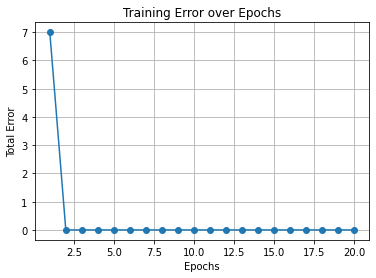

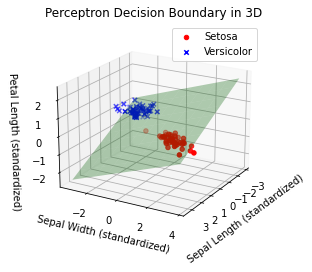

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# 1. 读取数据
Iris = pd.read_csv("iris.csv")

# 2. 提取前100行数据（Setosa 和 Versicolor）
X = Iris.iloc[0:100, 0:3].values  # 花萼长度、花萼宽度、花瓣长度
y = Iris.iloc[0:100, -1].values   # 类别名称

# 3. 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. 标签转换
y = np.where(y == 'Iris-setosa', 0, 1)

# 5. 初始化参数
weights = np.random.rand(X.shape[1])
bias = 0.5
learning_rate = 0.1
epochs = 20

# 6. 定义激活函数
def step_function(x):
    return 1 if x >= 0 else 0

# 7. 训练模型
errors = []

for epoch in range(epochs):
    epoch_error = 0
    for i in range(X.shape[0]):
        xi = X[i]
        z = np.dot(xi, weights) + bias
        y_pred = step_function(z)
        error = y[i] - y_pred
        epoch_error += abs(error)
        weights += learning_rate * error * xi
        bias += learning_rate * error
    errors.append(epoch_error)

# 8. 绘制误差曲线
plt.figure()
plt.plot(range(1, epochs+1), errors, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Training Error over Epochs")
plt.grid()
plt.show()

# 9. 三维可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], color='red', marker='o', label='Setosa')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], color='blue', marker='x', label='Versicolor')

# 创建网格
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 10),
    np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 10)
)

# 计算决策平面
if weights[2] != 0:
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
else:
    zz = np.full(xx.shape, X[:, 2].mean())

# 绘制决策平面
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# 设置视角
ax.view_init(elev=20, azim=30)

# 设置坐标轴标签
ax.set_xlabel('Sepal Length (standardized)')
ax.set_ylabel('Sepal Width (standardized)')
ax.set_zlabel('Petal Length (standardized)')
ax.set_title('Perceptron Decision Boundary in 3D')

# 添加图例
ax.legend()

plt.show()
